Preparing training data generator...
Found 20000 images belonging to 2 classes.
Preparing validation data generator...
Found 5000 images belonging to 2 classes.
Class indices: {'cat': 0, 'dog': 1}

Building simple CNN model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Compiling model...

Starting model training...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 334s 532ms/step - accuracy: 0.6690 - loss: 0.5915 - val_accuracy: 0.7554 - val_loss: 0.4936
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.7859 - loss: 0.4521 - val_accuracy: 0.8129 - val_loss: 0.4152
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.8299 - loss: 0.3787 - val_accuracy: 0.8075 - val_loss: 0.4222
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 239ms/step - accuracy: 0.8638 - loss: 0.3098 - val_accuracy: 0.8237 - val_loss: 0.4067
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.9003 - loss: 0.2372 - val_accuracy: 0.8343 - val_loss: 0.3910
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.9372 - loss: 0.1545 - val_accuracy: 0.8325 - val_loss: 0.4828
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.9641 - loss: 0.0935 - val_accuracy: 0.8267 - val_loss: 0.5473
Epoch 8/10
625/625 ━━━━━━━━━

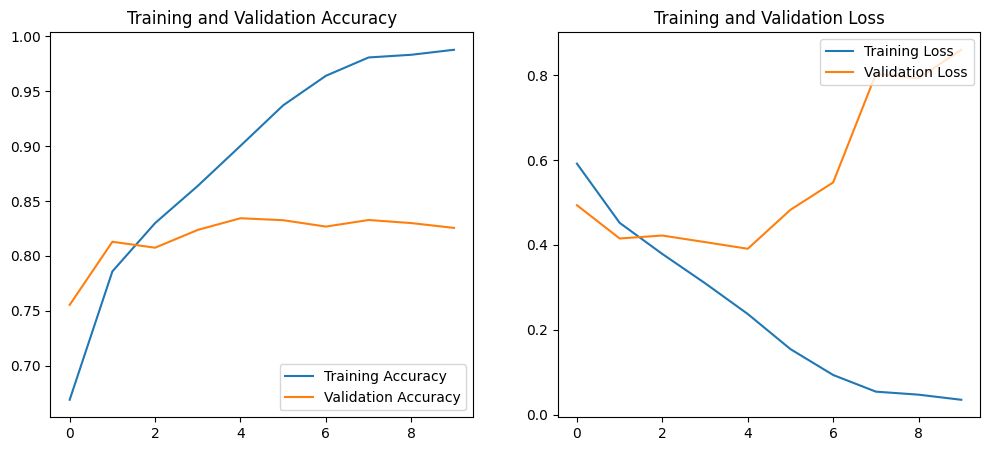

Model saved as 'my_baseline_cnn_model.keras'


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# --- 1. 定义常量 (与上一步相同) ---

# !! 修改为你本地的实际路径 !!
TRAIN_DIR = 'datasets/train'
VAL_DIR = 'datasets/val'

IMG_SIZE = (128, 128)  # 目标图像尺寸
BATCH_SIZE = 32
# 我们先训练 10 个周期 (epochs) 看看效果
# 一个 epoch = 模型看完了所有训练数据一次
EPOCHS = 10 


# --- 2. 准备数据 (与上一步相同) ---

# 训练数据生成器：
# 我们只做一件事：归一化 (rescale)
train_datagen = ImageDataGenerator(rescale=1./255)

# 验证数据生成器：
# 验证集也必须做同样的归一化
val_datagen = ImageDataGenerator(rescale=1./255)

print("Preparing training data generator...")
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'       # 二分类
)

print("Preparing validation data generator...")
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

print(f"Class indices: {train_generator.class_indices}")
# 确认 {'cat': 0, 'dog': 1}

# --- 3. 搭建你的基线CNN模型 (全新内容) ---
# 这就是项目报告 c) 部分要求你描述的模型 

print("\nBuilding simple CNN model...")
model = models.Sequential()

# Keras 2.9+ 推荐使用 Input 层显式声明输入形状
# 我们的输入是 128x128 像素的彩色 (3通道) 图片
model.add(layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

# 第 1 组: 卷积 + 池化
# Conv2D: 32个滤镜, 每个滤镜 3x3 大小。它会学习识别边缘、纹理等。
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# MaxPooling2D: 将特征图缩小一半，保留最显著的特征
model.add(layers.MaxPooling2D((2, 2)))

# 第 2 组: 卷积 + 池化
# 增加滤镜数量 (64)，学习更复杂的组合特征 (比如 "眼睛" 或 "鼻子")
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 第 3 组: 卷积 + 池化
# 再增加滤镜数量 (128)，学习更高级的特征
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# "压扁"：将 2D 的特征图转换成 1D 向量，送入"大脑"
model.add(layers.Flatten())

# "大脑" (全连接层)
# Dense: 128个神经元，它会分析所有特征并进行"思考"
model.add(layers.Dense(128, activation='relu'))

# "输出层" (关键！)
# Dense: 只有 1 个神经元
# activation='sigmoid': 这是二分类的核心。
# Sigmoid 函数会输出一个 0 到 1 之间的概率值
# < 0.5 代表 'cat' (标签0), > 0.5 代表 'dog' (标签1)
model.add(layers.Dense(1, activation='sigmoid'))

# 打印模型结构，检查参数量
model.summary()

# --- 4. 编译模型 (全新内容) ---
# 这是项目报告 c) 部分要求的损失函数和训练策略 [cite: 47]

print("\nCompiling model...")
model.compile(
    # 优化器: 'adam' 是目前最常用、效果最好的优化器之一
    # learning_rate: 学习率，这是你需要调优的超参数 [cite: 50]
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    
    # 损失函数: 'binary_crossentropy'
    # 这是二分类 (0 vs 1) 问题的“标准计分板”
    loss='binary_crossentropy',
    
    # 评估指标: 我们最关心的是 'accuracy' (准确率)
    metrics=['accuracy']
)

# --- 5. 训练模型 (全新内容) ---
# 这就是 "fit" 过程，模型开始从数据中学习

print("\nStarting model training...")
# .fit() 会返回一个 'history' 对象，包含了训练过程中的所有指标
history = model.fit(
    train_generator,  # 我们的训练数据
    
    # Keras 需要知道 ImageDataGenerator 一共有多少步
    # 总样本数 // 批大小
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    
    epochs=EPOCHS, # 训练 10 个周期
    
    validation_data=val_generator, # 我们的验证数据
    
    # 验证集有多少步
    validation_steps=val_generator.samples // BATCH_SIZE
)

print("Training complete.")

# --- 6. (可选) 可视化训练结果 ---
# 我们可以画出训练和验证的准确率，看看模型学得怎么样

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# --- 7. (可选) 保存模型 ---
# 训练好的模型可以保存下来，以便后续用于预测 [cite: 32]
model.save('my_baseline_cnn_model.keras')
print("Model saved as 'my_baseline_cnn_model.keras'")